In [1]:
# ██████╗  ██████╗  ███╗   ██╗ ███████╗ ██╗  ██████╗  ██╗   ██╗ ██████╗   █████╗  ████████╗ ██╗  ██████╗  ███╗   ██╗ 
#██╔════╝ ██╔═══██╗ ████╗  ██║ ██╔════╝ ██║ ██╔════╝  ██║   ██║ ██╔══██╗ ██╔══██╗ ╚══██╔══╝ ██║ ██╔═══██╗ ████╗  ██║ 
#██║      ██║   ██║ ██╔██╗ ██║ █████╗   ██║ ██║  ███╗ ██║   ██║ ██████╔╝ ███████║    ██║    ██║ ██║   ██║ ██╔██╗ ██║ 
#██║      ██║   ██║ ██║╚██╗██║ ██╔══╝   ██║ ██║   ██║ ██║   ██║ ██╔══██╗ ██╔══██║    ██║    ██║ ██║   ██║ ██║╚██╗██║ 
#╚██████╗ ╚██████╔╝ ██║ ╚████║ ██║      ██║ ╚██████╔╝ ╚██████╔╝ ██║  ██║ ██║  ██║    ██║    ██║ ╚██████╔╝ ██║ ╚████║ 
# ╚═════╝  ╚═════╝  ╚═╝  ╚═══╝ ╚═╝      ╚═╝  ╚═════╝   ╚═════╝  ╚═╝  ╚═╝ ╚═╝  ╚═╝    ╚═╝    ╚═╝  ╚═════╝  ╚═╝  ╚═══╝ 
# global variables that are chagned often

#█▀▀ █▀▀ █▄ █ █▀▀ █▀█ ▄▀█ █   
#█▄█ ██▄ █ ▀█ ██▄ █▀▄ █▀█ █▄▄ 
#
#variable for skipping all the plotting code for debugging processing
plotting = True

#chose while taxi types to be processed
process_ywl = True
process_grn = True
process_fhv = True
process_hvf = False   #setting this to true adds 24hr processing

#limits data size and processes to be quicker (for testing only) 
testing = False
start_month = 3        #testing var default 2
number_of_months = 5   #testing var default 11
start_day = 60         #testing var default 32ish
number_of_days = 100     #testing var default 366




#█▀▄ ▄▀█ ▀█▀ ▄▀█    █▀▄ █ █▀█ 
#█▄▀ █▀█  █  █▀█    █▄▀ █ █▀▄ 
#

#main data directory
data_dir = "/mnt/e/2021/Applied Data Science/Project 1/Data/"

#intermediate file names
processed_data_file = "_processed_data_"
tally_s1_file = "taxi_data_tallyed_s1.csv"
tally_s2_file = "taxi_data_tallyed_s2.csv"

In [2]:
#setting up libs

import numpy as np
from scipy.stats import entropy
from math import e

from collections import OrderedDict

import random as random
np.random.seed(1)
from pprint import pprint

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.show() 
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.show() 
plt.rcParams.update({'font.size': 22})

from scipy.stats import mode, chi2_contingency, pearsonr 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import datasets
from sklearn import svm

import warnings

warnings.filterwarnings("ignore")

In [3]:
# ██████╗  ██╗       ██████╗  ██████╗   █████╗  ██╗         ██╗   ██╗  █████╗  ██████╗  ███████╗ 
#██╔════╝  ██║      ██╔═══██╗ ██╔══██╗ ██╔══██╗ ██║         ██║   ██║ ██╔══██╗ ██╔══██╗ ██╔════╝ 
#██║  ███╗ ██║      ██║   ██║ ██████╔╝ ███████║ ██║         ██║   ██║ ███████║ ██████╔╝ ███████╗ 
#██║   ██║ ██║      ██║   ██║ ██╔══██╗ ██╔══██║ ██║         ╚██╗ ██╔╝ ██╔══██║ ██╔══██╗ ╚════██║ 
#╚██████╔╝ ███████╗ ╚██████╔╝ ██████╔╝ ██║  ██║ ███████╗     ╚████╔╝  ██║  ██║ ██║  ██║ ███████║ 
# ╚═════╝  ╚══════╝  ╚═════╝  ╚═════╝  ╚═╝  ╚═╝ ╚══════╝      ╚═══╝   ╚═╝  ╚═╝ ╚═╝  ╚═╝ ╚══════╝ 
# v2.0
# global variabels which can be tweeked

#█    ▀  █▀▀▄ █▀▀█ █▀▀█ █▀▀█ █  █ █▀▀ 
#█   ▀█▀ █▀▀▄ █▄▄▀ █▄▄█ █▄▄▀ █▄▄█ ▀▀█ 
#▀▀▀ ▀▀▀ ▀▀▀  ▀ ▀▀ ▀  ▀ ▀ ▀▀ ▄▄▄█ ▀▀▀ 
# imporint libarys used throughout

import time
import datetime

import pandas as pd
from numpy import log, sqrt
import seaborn as sns
import matplotlib.pyplot as plt

import os.path
from os.path import getsize
from urllib.request import urlretrieve

from pyspark.sql.functions import rand 
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

import warnings

#variable for skipping all the plotting code for debugging processing
start_time = time.perf_counter()
start_time_og = time.perf_counter()


#▀█▀ ▄▀█ ▀▄▀ █    █▀▄ ▄▀█ ▀█▀ ▄▀█ 
# █  █▀█ █ █ █    █▄▀ █▀█  █  █▀█ 
#

#file location
file_base = "_tripdata_"

#indexs for each of the main data set types
ywl_i = 0 
grn_i = 1
fhv_i = 2
hvf_i = 3

#used to identify which taxis to process
process_taxi = [process_ywl, process_grn, process_fhv, process_hvf]

#names related to each cab type in order
taxi_file_names = ["yellow","green","fhv","fhvhv"]
full_names = ["yellow cabs", "green cabs", "for higher vheciles", "for higher high volume"]

#column names for each cab type in order
column_names = [
    ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
    ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
    ['dispatching_base_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag'],
    ['hvfhs_license_num', 'dispatching_base_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag']
]

#2018 fhv files which was giving me trouble so added this schema for it
bad_fhv_schema = [2, 2018, ['Pickup_DateTime','DropOff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag','dispatching_base_number']]


#aliases for pickup time and dropoff time
pickup_time = ['tpep_pickup_datetime','lpep_pickup_datetime','pickup_datetime','pickup_datetime','Pickup_DateTime']
dropoff_time = ['tpep_dropoff_datetime','lpep_dropoff_datetime','dropoff_datetime','dropoff_datetime','DropOff_datetime']

#irrelavent collumns that can be dropped
irrelavent_columns = ['dispatching_base_number','DOtime','hvfhs_license_num','dispatching_base_num','VendorID','store_and_fwd_flag','extra','MTA_tax','improvement_surcharge','tip_amount','tolls_amount', 'ehail_fee', 'improvement_surcharge', 'congestion_surcharge']


#▀█▀ ▄▀█ ▀▄▀ █    █   █▀█ █▀▀ ▄▀█ ▀█▀ █ █▀█ █▄ █ █▀ 
# █  █▀█ █ █ █    █▄▄ █▄█ █▄▄ █▀█  █  █ █▄█ █ ▀█ ▄█ 
#

#location processing variables
#locations that will be removed as considered invalid
bad_locations = [1,132,138,264,265]

#location of the location id file
location_file = "taxi+_zone_lookup.csv"

#list of boroughs names as in the location file
boroughs_locations = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island","EWR","Unknown"]



#█▀▄ █▀█ █ █ █ █▄ █ █   █▀█ ▄▀█ █▀▄ 
#█▄▀ █▄█ ▀▄▀▄▀ █ ▀█ █▄▄ █▄█ █▀█ █▄▀ 
#

#download directory 
download_dir = data_dir

#taxi data base url
taxi_url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/"

#covid cases
covid_url = "https://data.cityofnewyork.us/api/views/rc75-m7u3/rows.csv?accessType=DOWNLOAD"
    
#location data
location_url = "https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv"

#█▀▄ ▄▀█ ▀█▀ █▀▀    █▀▄ █▀▀ █▀▀ █▀ 
#█▄▀ █▀█  █  ██▄    █▄▀ ██▄ █▀  ▄█ 
#
months_in_year = 12

#years of data used
years = [2019, 2020]

#feb 2019 was when fhvhv file started
fhvhv_started = [2,2019] 

#late feb 2020 was when the first case of covid was observed in NYC
covid_started = [2,2020] 

#preprocessing arrays

#hours each day to seperate each count
day_time_breakdown = [0,6,12,18]

#day of the year covid started on
start_day = int(datetime.datetime.strptime(
    " ".join([str(int) for int in covid_started]), 
    "%m %Y").__format__("%j"))

#pretty self explanitory
days_in_2020 = 366



#█▀█ █ █ ▀█▀ █   █ █▀▀ █▀█ █▀ 
#█▄█ █▄█  █  █▄▄ █ ██▄ █▀▄ ▄█ 
# values for calculating outliers

#all vals must be withing the .99 percent of data
outlier_percent = (1-.99)/2

#buffer for graphing and removing outliers from graphs
fare_amount_graph_buffer = 15

#accuracy when calculating the percentile
percentile_accuracy = 0.00001



#█▀▀ █▀█ █ █ █ █▀▄    █▀▄ █▀▀ █▀▀ █▀ 
#█▄▄ █▄█ ▀▄▀ █ █▄▀    █▄▀ ██▄ █▄▄ ▄█ 
#

#files
covid_restrictions_file = "covid_restrictions.csv"
covid_cases_file = "COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv"

#list of boroughs as named in the covid file (same order)
covid_boroughs =["bx","bk","mn","qn","si"]



#█▀ █▀▀ ▀█▀ █ █ █▀█    █▀▀ █▀█ █▄ █ █▀▄ █ ▀█▀ █ █▀█ █▄ █ █▀ 
#▄█ ██▄  █  █▄█ █▀▀    █▄▄ █▄█ █ ▀█ █▄▀ █  █  █ █▄█ █ ▀█ ▄█ 
#

#plotting is using a yellow data set so must skip plotting if no yellow
if plotting:
    if not (process_taxi[ywl_i] and process_taxi[grn_i]):
        plotting = False
        
        
#if in a testing mode, sets up variables so file processes correctly         
if testing:
    
    #changes the download dir to not overwrite data
    download_dir =  data_dir.split("1/Data/")[0] + "1/TestDownload/"
    
    #changes some timing variabels to anaylise only what is needed for testing
    covid_started[0] = start_month
    months_in_year = start_month + number_of_months - 1
    graph_month = start_month
    days_in_2020 = start_day + number_of_days
else:
    
    #if not testing graphing month is 5 (so may)
    graph_month = 5
    
    
    
#█▀▄▀█ █ █▀ █▀▀    █▀▀ █ █ █▄ █ █▀▀ 
#█ ▀ █ █ ▄█ █▄▄    █▀  █▄█ █ ▀█ █▄▄ 
# specialized functions

#sets seed for when its used
seed = 1

# log function to deal with integer count data, added conditions to set any negative
# or 0 values to be 0
def logf(x):
    return (log(x) if x > 0 else 0)

In [4]:
#█▀▀ ▄▀█ █▀ █▀▀ █▀ 
#█▄▄ █▀█ ▄█ ██▄ ▄█ 
# #importing covid case data
covid_cases = pd.read_csv(data_dir + covid_cases_file)

#makes the names of columns lowercase
covid_cases.columns = covid_cases.columns.str.lower()

#makes the date column datetime object
covid_cases['date_of_interest'] = covid_cases['date_of_interest']\
    .transform(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))

#renaming some badly named columns
covid_cases['probable_death_count'] = covid_cases['death_count_probable']
covid_cases['hospitalized_count_7day_avg'] = covid_cases['hosp_count_7day_avg']
covid_cases = covid_cases.drop(['death_count_probable','hosp_count_7day_avg'],axis=1)

In [5]:

#main data directory
data_dir = "/mnt/e/2021/Applied Data Science/Project 1/Data/"

#list of boroughs names as in the location file
boroughs = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]

df = pd.read_csv(data_dir + tally_s1_file)


In [6]:
#checks data looks alright
df.loc[(df["borough"] == 2) & (df["fhv"] == 0)]

,Unnamed: 0,day_year,day_week,week,borough,fhv,2019_night,2019_morn,2019_arvo,2019_even,...,phase_2,phase_3,phase_4,large_capacity_public,gatherings,broadway,movies,stadium_capcity,indoor_religious,curfew
4,4,32,6,4,2,0,46401,61293,113616,113702,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
14,14,33,0,5,2,0,55188,48120,97169,73240,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
24,24,34,1,5,2,0,10238,87105,93468,100421,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
34,34,35,2,5,2,0,11333,96516,101806,119016,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
44,44,36,3,5,2,0,15254,102070,110476,139430,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3294,361,6,51,2,0,21429,29171,63555,59576,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3304,3304,362,0,52,2,0,27110,25191,62766,50039,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3314,3314,363,1,52,2,0,10122,45975,75511,55592,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0
3324,3324,364,2,52,2,0,12736,38494,66496,68564,...,1.0,1.0,1.0,1.0,0.02,0.0,0.0,0.0,0.5,1.0


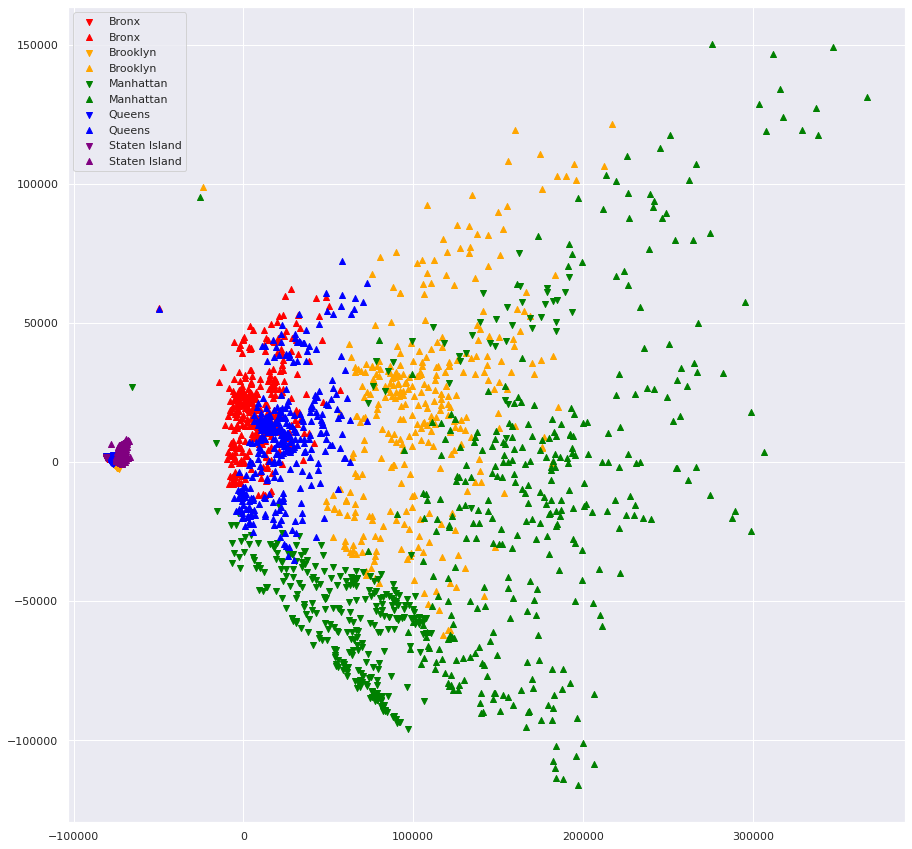

In [7]:
#showing low accuracies from the clustering point of view

#sets up and fits the PCA algorithm with 2 dimensions 
pca = PCA(n_components = 2)
s = pca.fit_transform(df[df.columns.difference(['Unnamed: 0', 'day_year', 'day_week', 'week', 'borough', 'fhv']).tolist()])

#creating colour scheme with each colour below representing its respective class label
colours = ["red", "orange", "green", "blue", "purple"]
shapes = ["v" , "^"] #up then down
labels = boroughs

#plotting each class
for borough, colour, label in zip(np.unique(df["borough"]), colours, labels):
    for fhv, shape in zip(np.unique(df["fhv"]), shapes):
        plt.scatter(
            s[(df["borough"] == borough) & (df["fhv"] == fhv), 0], 
            s[(df["borough"] == borough) & (df["fhv"] == fhv), 1],
            label=label, 
            c=colour,
            marker = shape
        )
    
#printing the plot
plt.legend()
plt.show()


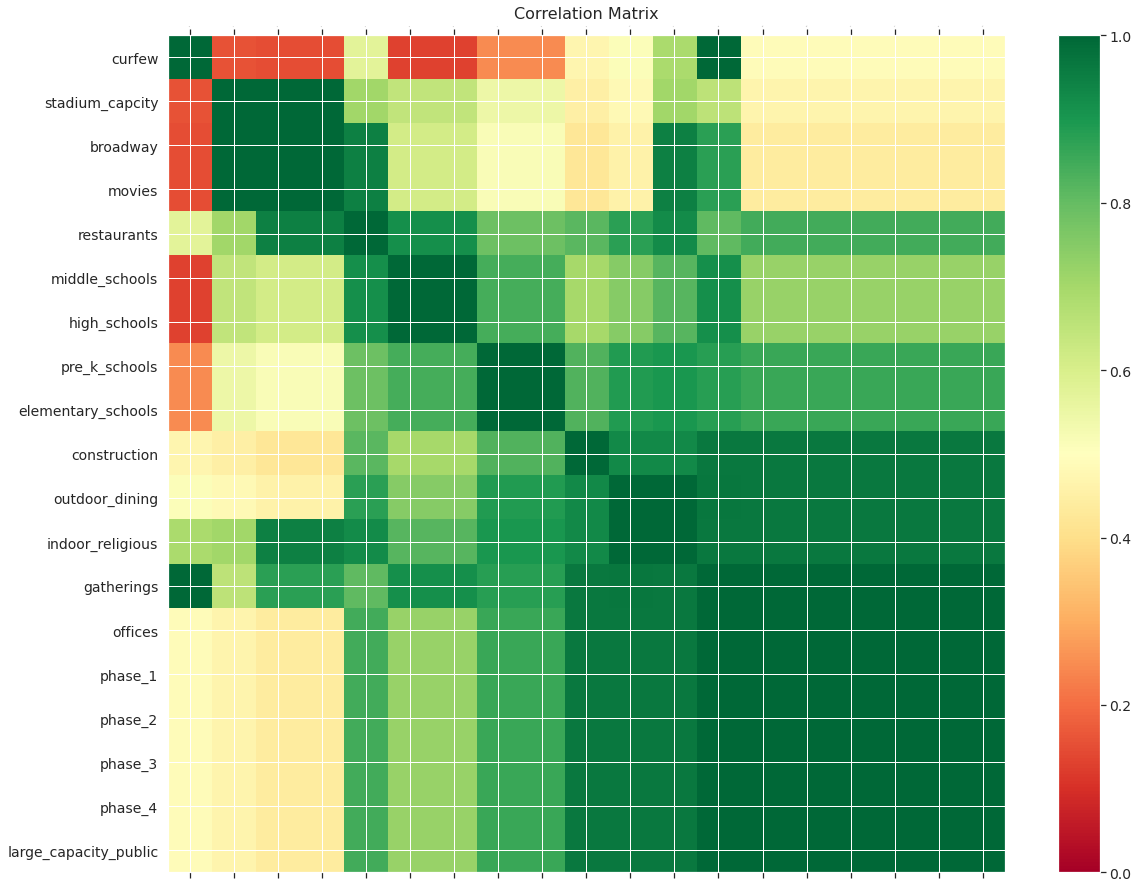

In [8]:
dft = df#.loc[(df["borough"] == 2) & (df["fhv"] == 0)]

#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    


covid_cols = [
            'curfew',
            'stadium_capcity', 
            'broadway', 
            'movies',
            'restaurants',
            'middle_schools',
            'high_schools', 
            'pre_k_schools', 
            'elementary_schools', 
            'construction', 
            'outdoor_dining', 
            'indoor_religious', 
            'gatherings', 
            'offices', 
            'phase_1', 
            'phase_2', 
            'phase_3', 
            'phase_4',
            'large_capacity_public'
]

dft[covid_cols]=(dft[covid_cols]-dft[covid_cols].min())/(dft[covid_cols].max()-dft[covid_cols].min())


dfs = dft[covid_cols]



f = plt.figure(figsize=(19, 15))
plt.matshow(dfs.corr(method=cramers_v), fignum=f.number,vmin = 0, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#curfew if its needed
#one from top 3-4
#one from next 2-3
#one of the schools
#one of construct - gath
#or one of construct to large capacity public

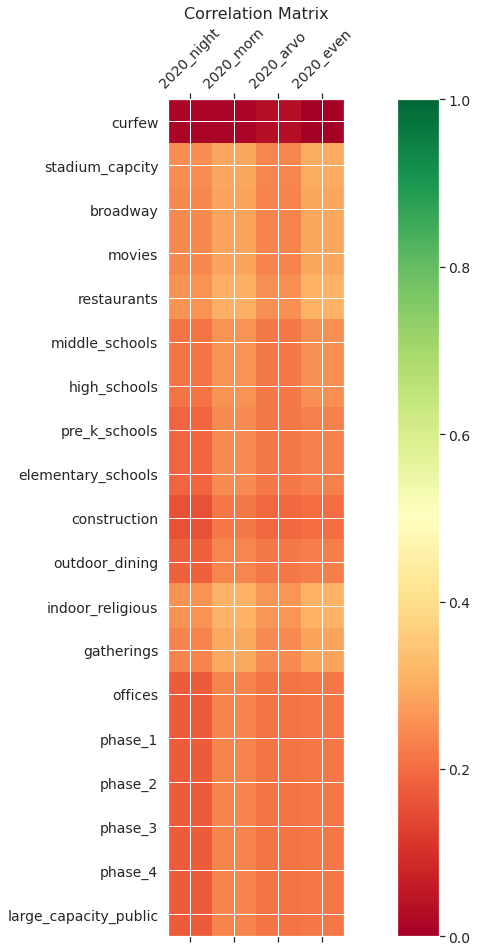

In [9]:
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

day_parts_2020 = ["2020_night","2020_morn","2020_arvo","2020_even"]
column_temp1 = covid_cols.copy()
column_temp1.extend(day_parts_2020)

dfs = dft[column_temp1].corr(method=correlation_ratio).drop(day_parts_2020)[day_parts_2020].abs()#[covid_cols, day_parts_2020]


f = plt.figure(figsize=(19, 15))
plt.matshow(dfs, fignum=f.number, vmin = 0, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#curfew if its needed
#its useless? tiny increase to 2020_night but nothing much

#one from top 3-4
#all quite good
#taking stadium_capcity

#one from next 2-3
#clearly restaurants

#one of the schools
#highschools

#one of construct - gath
#indoor religious seems to be slighlty better

#or one of construct to large capacity public
#all pretty much the same keep phase_1


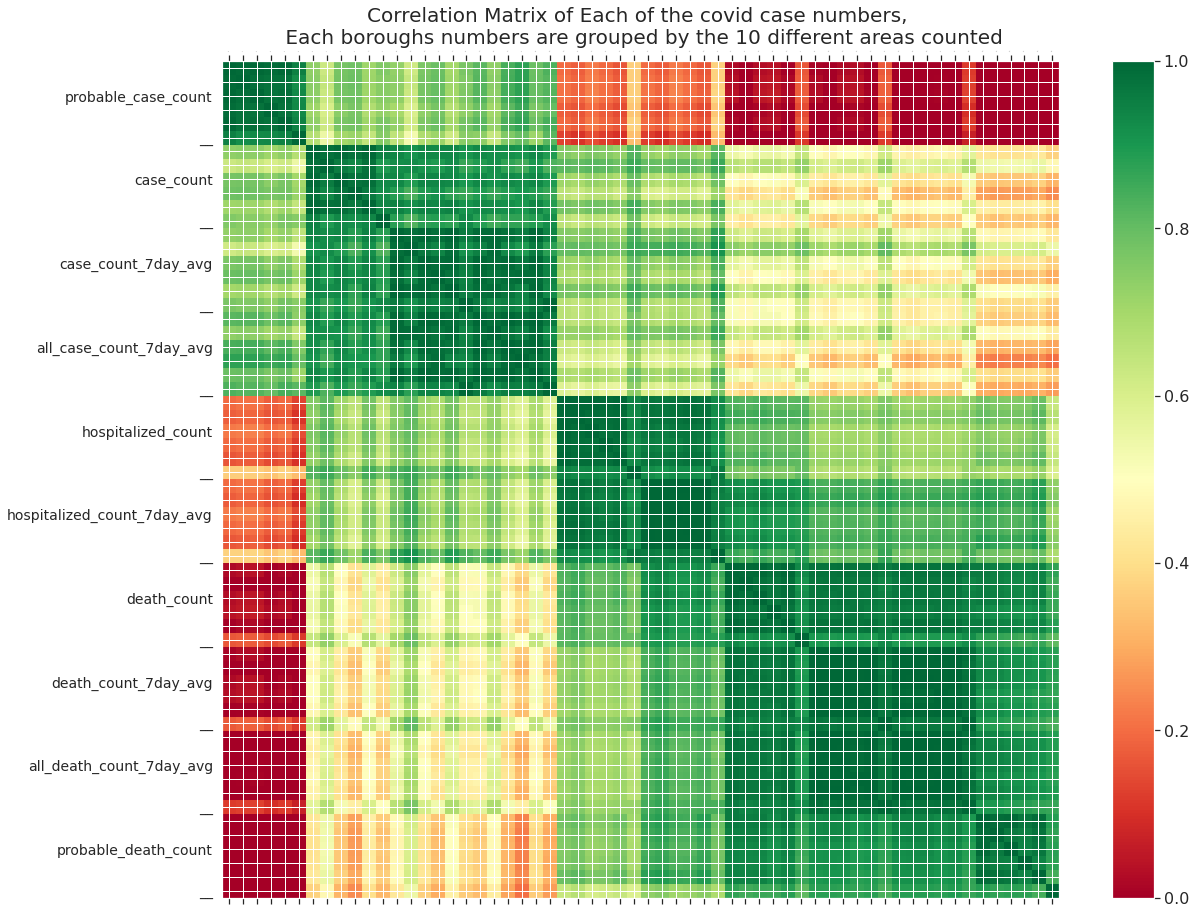

In [10]:
columns = [

    


        
        'probable_case_count',
        'bx_probable_case_count',
        'bk_probable_case_count', 
        'mn_probable_case_count', 
        'qn_probable_case_count', 
        'si_probable_case_count', 
        
        'case_count', 
        'bx_case_count', 
        'bk_case_count',
        'mn_case_count', 
        'qn_case_count', 
        'si_case_count', 
    
        'case_count_7day_avg',
        'bx_case_count_7day_avg', 
        'bk_case_count_7day_avg',
        'mn_case_count_7day_avg',
        'qn_case_count_7day_avg',
        'si_case_count_7day_avg',
    
        'all_case_count_7day_avg', 
        'bx_all_case_count_7day_avg',
        'bk_all_case_count_7day_avg', 
        'mn_all_case_count_7day_avg', 
        'qn_all_case_count_7day_avg', 
        'si_all_case_count_7day_avg',
    
        'hospitalized_count', 
        'bx_hospitalized_count', 
        'bk_hospitalized_count', 
        'mn_hospitalized_count',
        'qn_hospitalized_count',
        'si_hospitalized_count',
    
        'hospitalized_count_7day_avg',    
        'bx_hospitalized_count_7day_avg', 
        'bk_hospitalized_count_7day_avg',
        'mn_hospitalized_count_7day_avg',
        'qn_hospitalized_count_7day_avg',
        'si_hospitalized_count_7day_avg',  
  
        'death_count', 
        'bx_death_count', 
        'bk_death_count',
        'mn_death_count', 
        'qn_death_count', 
        'si_death_count', 
        
        'death_count_7day_avg',
        'bx_death_count_7day_avg',
        'bk_death_count_7day_avg', 
        'mn_death_count_7day_avg', 
        'qn_death_count_7day_avg', 
        'si_death_count_7day_avg', 
    
        'all_death_count_7day_avg',  
        'bx_all_death_count_7day_avg', 
        'bk_all_death_count_7day_avg',
        'mn_all_death_count_7day_avg',
        'qn_all_death_count_7day_avg',
        'si_all_death_count_7day_avg',
    
        'probable_death_count',    
        'bx_probable_death_count',
        'bk_probable_death_count', 
        'mn_probable_death_count', 
        'qn_probable_death_count', 
        'si_probable_death_count'
        ]


xlabel = [
        'probable_case_count',
        'case_count', 
        'case_count_7day_avg',
        'all_case_count_7day_avg', 
        'hospitalized_count', 
        'hospitalized_count_7day_avg',    
        'death_count', 
        'death_count_7day_avg',
        'all_death_count_7day_avg',  
        'probable_death_count'
]

real_xlabel = []

for i in range(0, len(xlabel)):
    real_xlabel.extend([""]*1)
    real_xlabel.extend([""]*1)
    real_xlabel.append(xlabel[i])
    real_xlabel.extend([""]*2)
    real_xlabel.extend(["__"]*1)


dfs = covid_cases[columns]

f = plt.figure(figsize=(19, 15))
plt.matshow(dfs.corr(), fignum=f.number,vmin = 0, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), real_xlabel, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix of Each of the covid case numbers, \n Each boroughs numbers are grouped by the 10 different areas counted', fontsize=20);


#one from first 2, one from next 6, one from next 8 and one from last 4

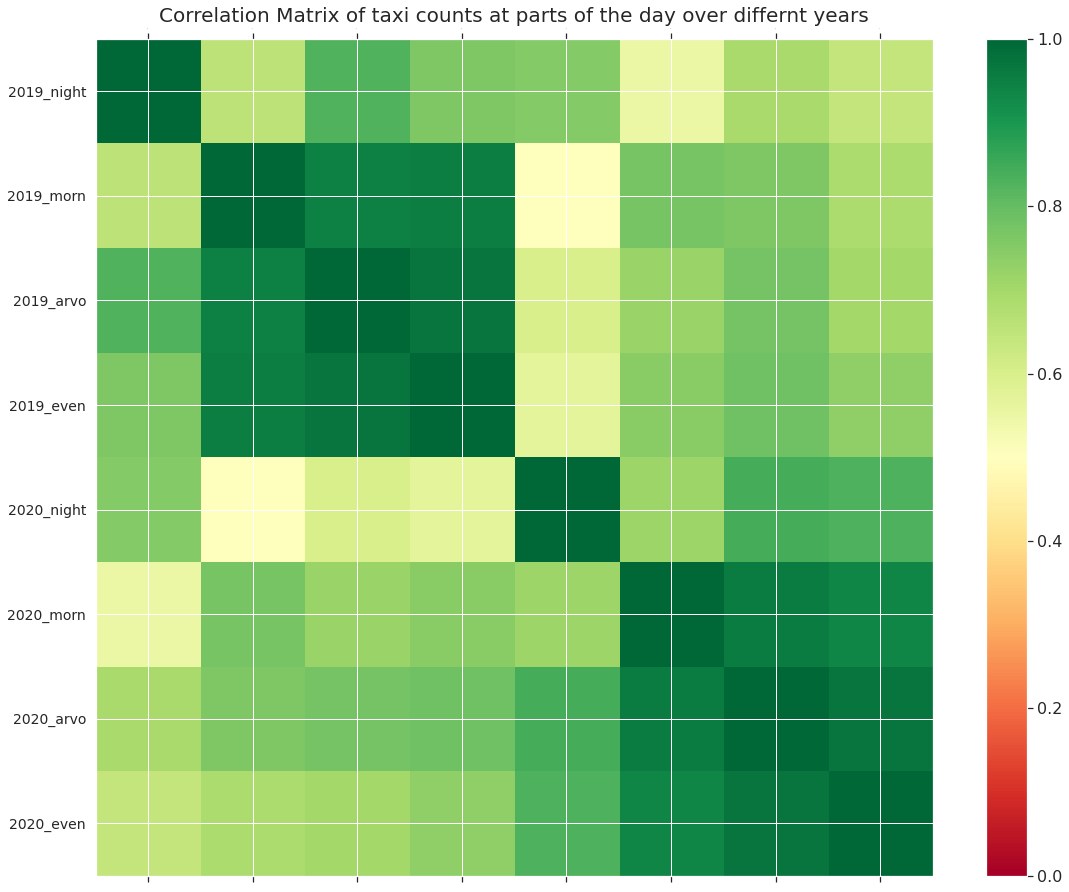

In [11]:
columns = [
        "2019_night", 
        "2019_morn",
        "2019_arvo",
        "2019_even",
        "2020_night", 
        "2020_morn",
        "2020_arvo",
        "2020_even"
        ]

taxi_cols_2020 = [
        "2020_night", 
        "2020_morn",
        "2020_arvo",
        "2020_even"]

#real_xlabel = []
#
#for i in range(0, len(xlabel)):
#    real_xlabel.extend([""]*1)
#    real_xlabel.extend([""]*1)
#    real_xlabel.append(xlabel[i])
#    real_xlabel.extend([""]*2)
#    real_xlabel.extend(["__"]*1)


dfs = df[columns]

cor_matrix = dfs.corr()

f = plt.figure(figsize=(19, 15))
plt.matshow(cor_matrix, fignum=f.number,vmin = 0, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix of taxi counts at parts of the day over differnt years', fontsize=20);


#one from first 2, one from next 6, one from next 8 and one from last 4



In [12]:
print("highest average correlation for 2020 goes to: " + cor_matrix.iloc[4:8,4:8].mean().sort_values(ascending = False).index[0])


highest average correlation for 2020 goes to: 2020_arvo


In [13]:
color_map = plt.cm.get_cmap('rainbow')
reversed_color_map = color_map.reversed()

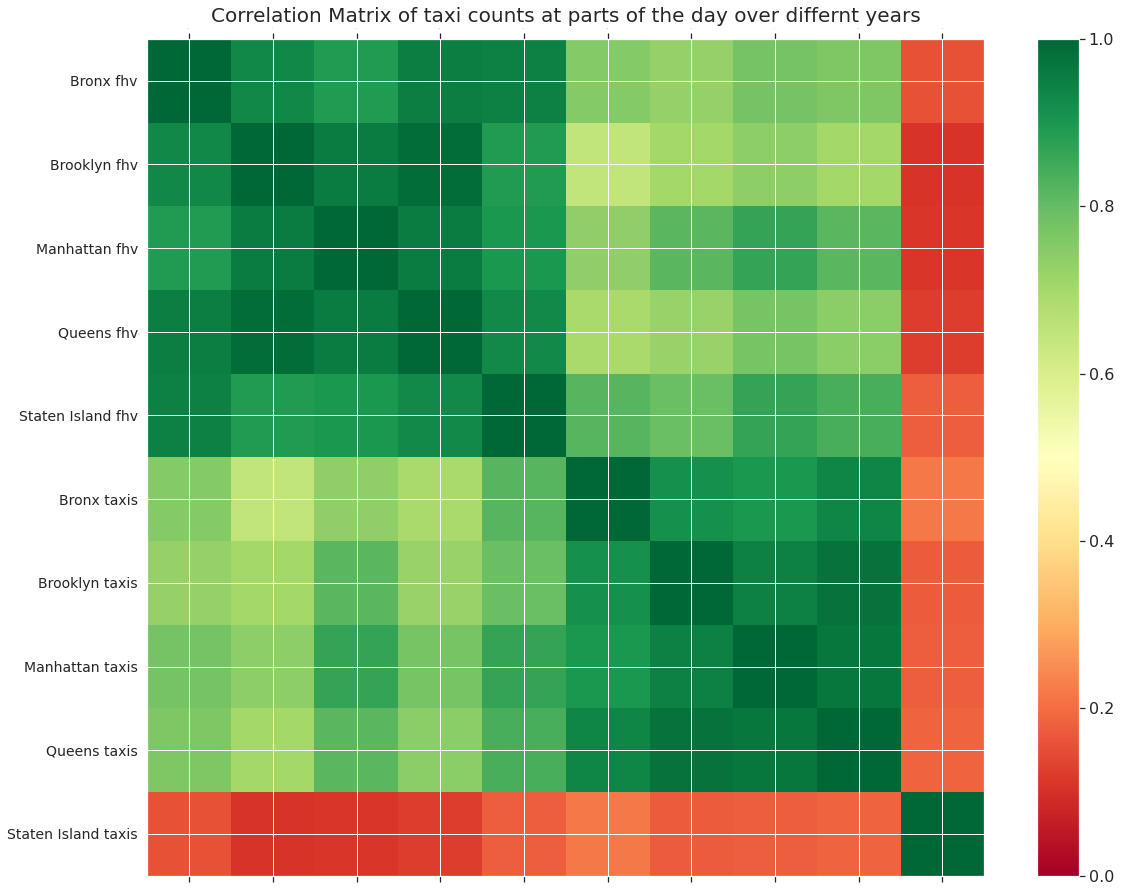

In [14]:
taxi_col = "2020_arvo"

dfs = df.pivot(index = 'day_year', columns = ['fhv','borough'], values = '2020_arvo')

dfs = pd.concat([dfs[1],dfs[0]], axis=1, join='inner')


y_labels = [x + " fhv" for x in boroughs]
y_labels.extend([x + " taxis" for x in boroughs])

cor_matrix = dfs.corr()

f = plt.figure(figsize=(19, 15))
plt.matshow(cor_matrix, fignum=f.number, vmin = 0, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), y_labels, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix of taxi counts at parts of the day over differnt years', fontsize=20);



borough_val = 3


In [15]:
print("highest average correlation for taxis goes to: " + boroughs[cor_matrix.iloc[5:10,5:10].mean().sort_values(ascending = False).index[0]])
print("highest average correlation for fhv goes to: " + boroughs[cor_matrix.iloc[0:5,0:5].mean().sort_values(ascending = False).index[0]])


highest average correlation for taxis goes to: Queens
highest average correlation for fhv goes to: Queens


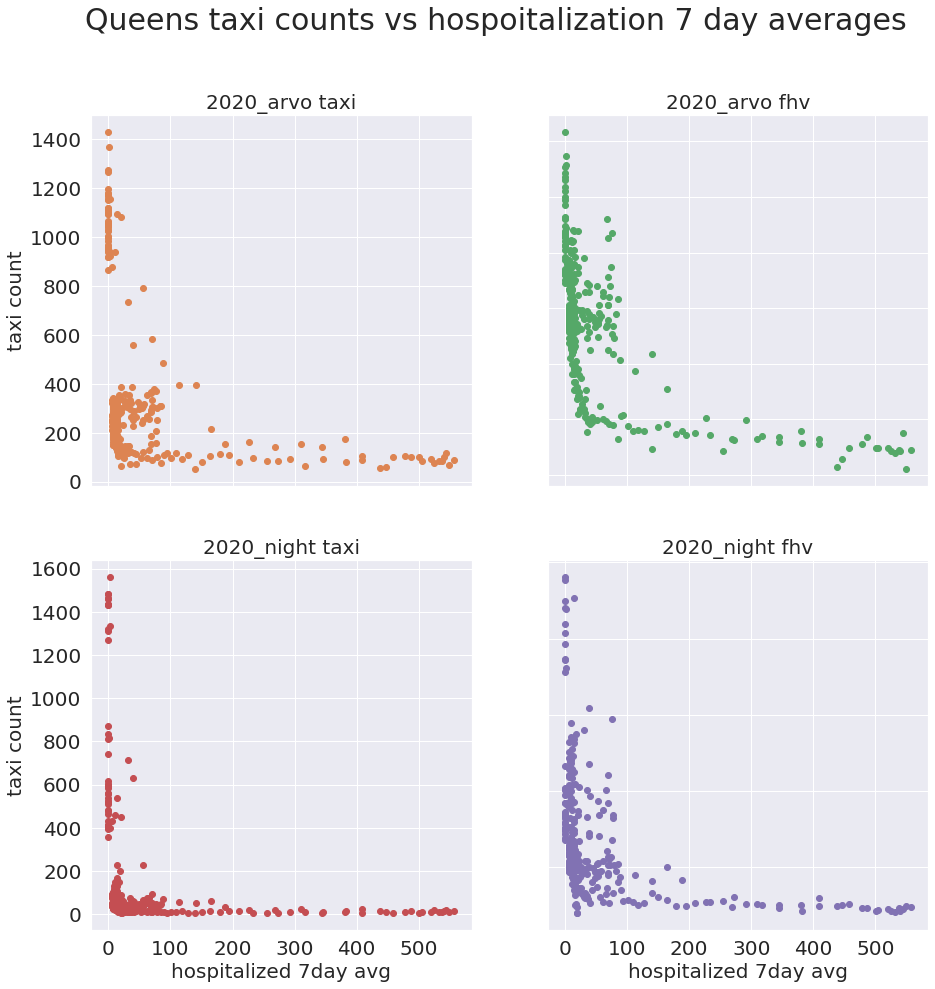

In [16]:
#pivots data to extract the right values for plotting
dfs = df[df["borough"] == 3].pivot(
    index = 'day_year', 
    columns = ['fhv'], 
    values = ['2020_arvo','2020_night', 'borough_hospitalized_count_7day_avg']
)

#creates 4 sub plots
fig, axs = plt.subplots(2, 2)

fig.suptitle("Queens taxi counts vs hospoitalization 7 day averages", fontsize = 30)



#for each combo of taxi/ fhv and arvo/ night
for fhv in [0, 1]:
    for part_of_day_index in [0,1]:
        
        #turns the index into a string, index is also needed for graphing
        part_of_day = ['2020_arvo','2020_night'][part_of_day_index]
        
        #y values are the taxi counts
        y = dfs[part_of_day][fhv]
        
        #x values are the hospitlization counts
        x = dfs['borough_hospitalized_count_7day_avg'][fhv]
        
        #creates a scatter subplot
        axs[part_of_day_index, fhv].scatter(
            x, y, 
            color = ("C" +  str((1 + fhv + 2 * part_of_day_index))    #gives an individual colour
            ))
        
        #labels the graph
        axs[part_of_day_index, fhv].set_title(part_of_day + " " + ['taxi','fhv'][fhv], fontsize=20)

        
#labels the graph as a whole
for ax in axs.flat:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.set(ylabel='taxi count', xlabel='hospitalized 7day avg')
    ax.label_outer()




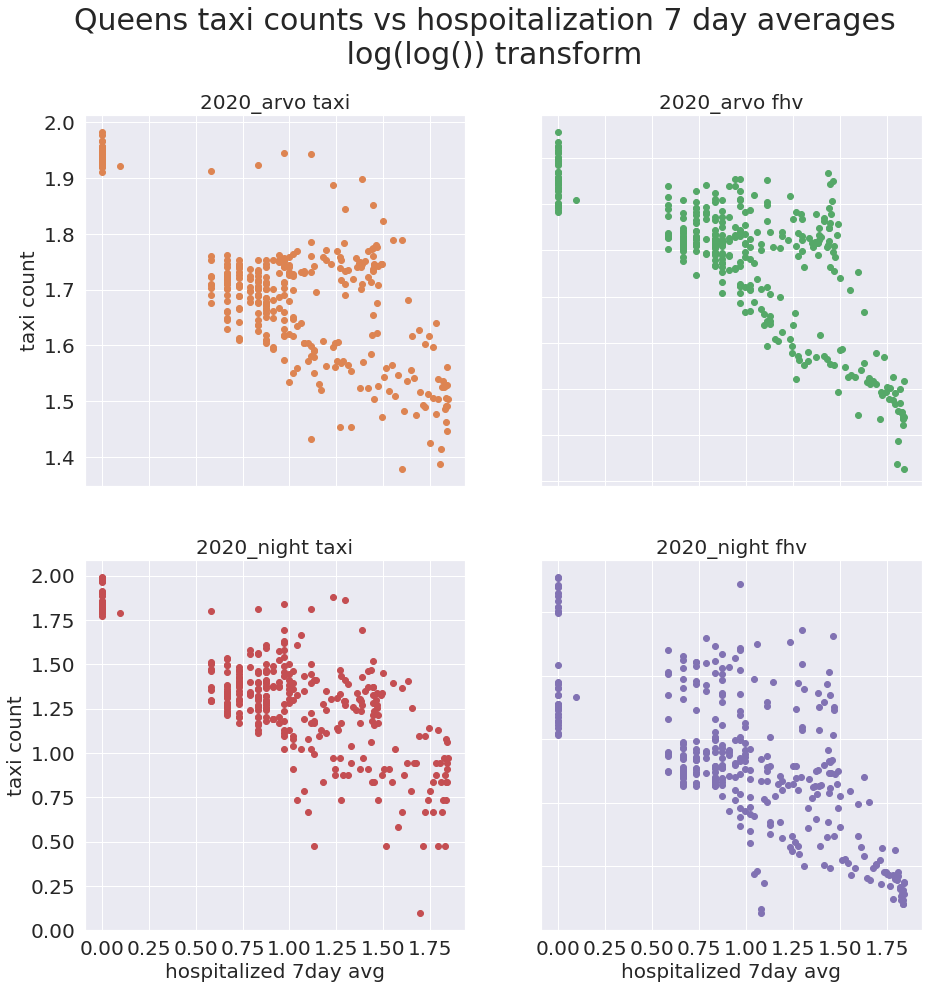

In [17]:
def loglogfa(arr):
    out = []
    for x in arr:
        if x > e:
            out.append(log(log(x)))
        else:
            out.append(0)
    return out


#creates 4 sub plots
fig, axs = plt.subplots(2, 2)

fig.suptitle("Queens taxi counts vs hospoitalization 7 day averages \n log(log()) transform", fontsize = 30)



#for each combo of taxi/ fhv and arvo/ night
for fhv in [0, 1]:
    for part_of_day_index in [0,1]:
        
        #turns the index into a string, index is also needed for graphing
        part_of_day = ['2020_arvo','2020_night'][part_of_day_index]
        
        #y values are the taxi counts
        y = loglogfa(dfs[part_of_day][fhv])
        
        #x values are the hospitlization counts
        x = loglogfa(dfs['borough_hospitalized_count_7day_avg'][fhv])
        
        #creates a scatter subplot
        axs[part_of_day_index, fhv].scatter(
            x, y, 
            color = ("C" +  str((1 + fhv + 2 * part_of_day_index))    #gives an individual colour
            ))
        
        #labels the graph
        axs[part_of_day_index, fhv].set_title(part_of_day + " " + ['taxi','fhv'][fhv], fontsize=20)

        
#labels the graph as a whole
for ax in axs.flat:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    ax.set(ylabel='taxi count', xlabel='hospitalized 7day avg')
    ax.label_outer()




In [18]:
e

2.718281828459045

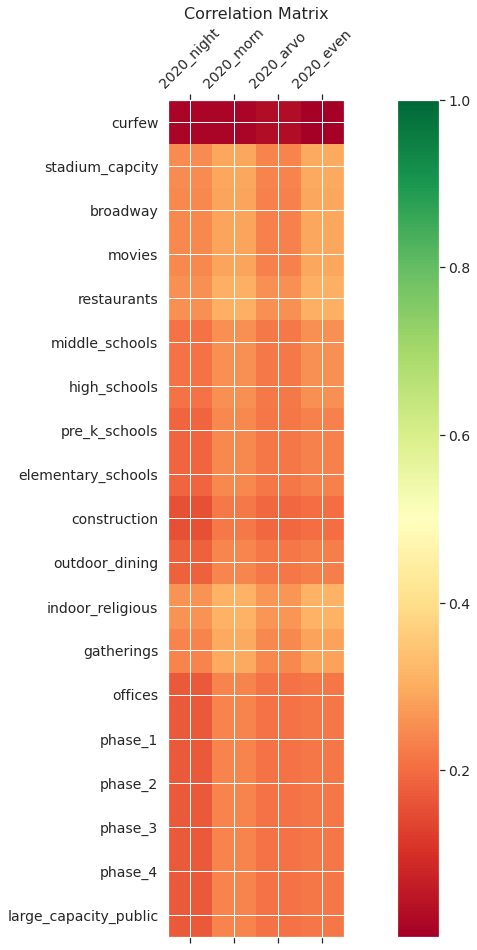

In [19]:
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

day_parts_2020 = ["2020_night","2020_morn","2020_arvo","2020_even"]
column_temp1 = covid_cols.copy()
column_temp1.extend(day_parts_2020)

dfs = dft[column_temp1].corr(method=correlation_ratio).drop(day_parts_2020)[day_parts_2020].abs()#[covid_cols, day_parts_2020]


f = plt.figure(figsize=(19, 15))
plt.matshow(dfs, fignum=f.number, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#curfew if its needed
#its useless? tiny increase to 2020_night but nothing much

#one from top 3-4
#all quite good
#taking stadium_capcity

#one from next 2-3
#clearly restaurants

#one of the schools
#none very relavent

#one of construct - gath
#indoor religious seems to be slighlty better

#or one of construct to large capacity public
#all pretty much the same keep phase_1

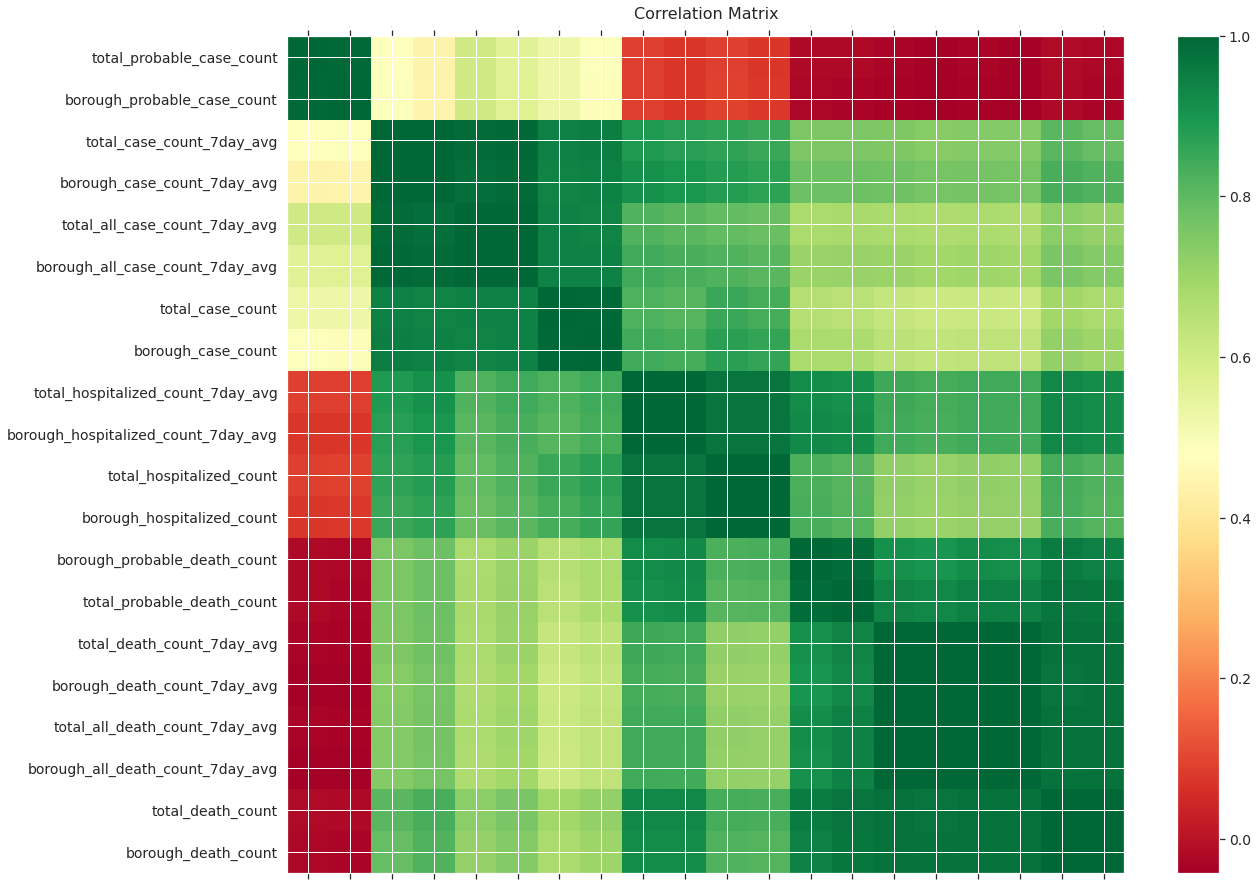

In [20]:
dft = df.loc[(df["borough"] == 3)]# & (df["fhv"] == 0)]

covid_cols = [
     'total_probable_case_count',
     'borough_probable_case_count',
    
     'total_case_count_7day_avg',
     'borough_case_count_7day_avg',
     'total_all_case_count_7day_avg', 
     'borough_all_case_count_7day_avg', 
     'total_case_count', 
     'borough_case_count', 
    
     'total_hospitalized_count_7day_avg',
     'borough_hospitalized_count_7day_avg',
     'total_hospitalized_count', 
     'borough_hospitalized_count', 
    
     'borough_probable_death_count',
     'total_probable_death_count',
     'total_death_count_7day_avg', 
     'borough_death_count_7day_avg', 
     'total_all_death_count_7day_avg',
     'borough_all_death_count_7day_avg',
     'total_death_count', 
     'borough_death_count', 
]

dfs = dft[covid_cols]




f = plt.figure(figsize=(19, 15))
plt.matshow(dfs.corr(), fignum=f.number, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#one from first 2, one from next 6, one from next 8 and one from last 4

In [21]:
#correlation between taxi numbers in different boroughs
dfs.index

Int64Index([   6,    7,   16,   17,   26,   27,   36,   37,   46,   47,
            ...
            3296, 3297, 3306, 3307, 3316, 3317, 3326, 3327, 3336, 3337],
           dtype='int64', length=668)

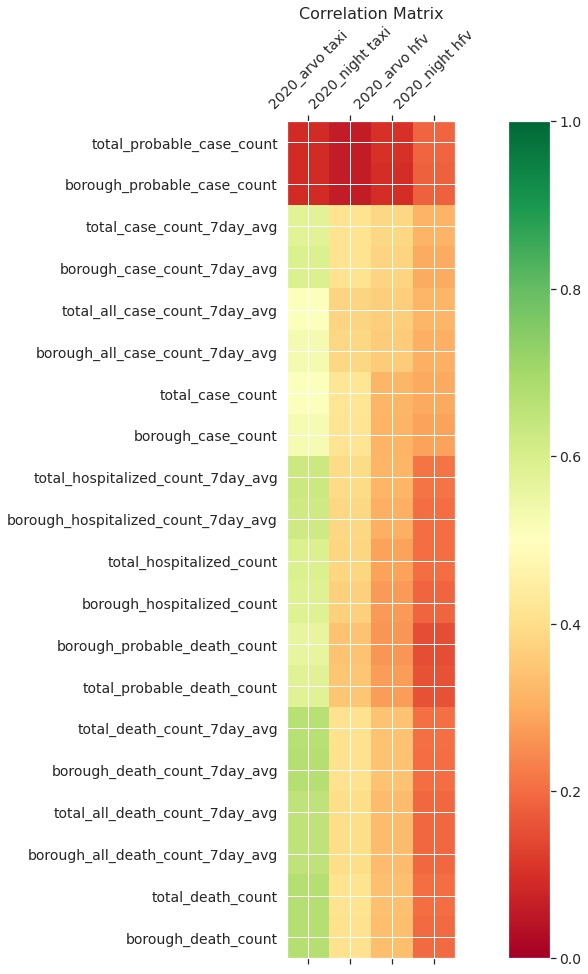

In [22]:
covid_cols = [
     'total_probable_case_count',
     'borough_probable_case_count',
    
     'total_case_count_7day_avg',
     'borough_case_count_7day_avg',
     'total_all_case_count_7day_avg', 
     'borough_all_case_count_7day_avg', 
     'total_case_count', 
     'borough_case_count', 
    
     'total_hospitalized_count_7day_avg',
     'borough_hospitalized_count_7day_avg',
     'total_hospitalized_count', 
     'borough_hospitalized_count', 
    
     'borough_probable_death_count',
     'total_probable_death_count',
     'total_death_count_7day_avg', 
     'borough_death_count_7day_avg', 
     'total_all_death_count_7day_avg',
     'borough_all_death_count_7day_avg',
     'total_death_count', 
     'borough_death_count', 
]

val_cols = ['2020_arvo','2020_night']
val_cols.extend(covid_cols)

#pivots data to extract the right values for plotting
dfs = df[df["borough"] == 3].pivot(
    index = 'day_year', 
    columns = ['fhv'], 
    values = val_cols
)

dfs = dfs.corr()[["2020_arvo","2020_night"]].drop(["2020_arvo","2020_night"]).abs()
df1 = dfs.drop(0,level="fhv").drop(0,level="fhv",axis = 1)
df1.index = df1.index.droplevel(1)
df1.columns = df1.columns.droplevel(1)
df2 = dfs.drop(1,level="fhv").drop(1,level="fhv",axis = 1)
df2.index = df2.index.droplevel(1)
df2.columns = df2.columns.droplevel(1)
dfs = pd.concat([df1, df2], axis=1, join='inner')

x_labs = dfs.select_dtypes(['number']).columns
x_labs = [x_labs[x] + " " + ["taxi","taxi","hfv","hfv"][x] for x in range(0,4)]

f = plt.figure(figsize=(19, 15))
plt.matshow(dfs, fignum=f.number, vmin = 0, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), x_labs, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [23]:
min_day_delta = -14
max_day_delta = 8


covid_day0 = covid_cases["date_of_interest"][0]

day0 = dft.loc[dft["fhv"] == 1]["day_year"].values[0]
datetime0 = datetime.datetime.strptime( " ".join( [str(int) for int in [day0, covid_started[1]]]) ,"%j %Y" ) + datetime.timedelta(min_day_delta)



current_day = 2

max_corr_delta = 0
max_corr = 0

covid_case_cols = [
    "qn_hospitalized_count_7day_avg", 
    "qn_hospitalized_count",
    'qn_case_count', 
    'qn_case_count_7day_avg',  
    'qn_death_count', 
    'qn_all_death_count_7day_avg',  
]


avg_denom = 2 * len(taxi_cols_2020) * len(covid_case_cols) * len(boroughs)

    
#for each combo of taxi/ fhv and arvo/ night
for current_day in range(0, max_day_delta - min_day_delta):
    
    
    r_count = 0
    for covid_case_col in covid_case_cols:
        covid_vals = [0]*(covid_day0 - datetime0).days
        covid_vals.extend(covid_cases[covid_case_col].values)
        covid_vals = loglogfa(covid_vals)
        
        
        for fhv in [0, 1]:
            for part_of_day in taxi_cols_2020:
                for borough_i in range(0, len(boroughs)):
            
            
                    #turns the index into a string, index is also needed for graphing
                    part_of_day = taxi_cols_2020[part_of_day_index]
                    taxi_counts = loglogfa(
                        df.loc[
                            (df["borough"] == borough_i) & 
                            (df["fhv"] == fhv)
                        ][part_of_day])
                
                    
                    values = covid_vals[current_day: current_day + len(taxi_counts)]
                
                    r, p = pearsonr(values, taxi_counts)
                    r_count += r
            
            
    average_r = r_count/avg_denom
        
    print(str(current_day + min_day_delta) + ": " + str(abs(average_r)))
        
    if(abs(average_r) > max_corr):
        max_corr = abs(average_r)
        max_corr_day = current_day + min_day_delta
        
        
    

-14: 0.6160558028889962
-13: 0.6332528978472817
-12: 0.6414410043672532
-11: 0.6483321836403222
-10: 0.6509392721778463
-9: 0.6512945683374104
-8: 0.6458717644675271
-7: 0.6448461221252604
-6: 0.654266069604671
-5: 0.6543539710937805
-4: 0.648643383830213
-3: 0.6432563484524692
-2: 0.6303199737098658
-1: 0.6136488951596658
0: 0.6002959945772104
1: 0.6013895815918697
2: 0.5914344170879043
3: 0.5776346767796486
4: 0.5622869746519082
5: 0.5427695730103836
6: 0.5192960915385307
7: 0.4993400113178438


In [24]:
#over +- 100 days max was -5
max_corr_day

#do -7 as very simliar


-5

In [25]:
covid_cases

,date_of_interest,case_count,probable_case_count,hospitalized_count,death_count,case_count_7day_avg,all_case_count_7day_avg,death_count_7day_avg,all_death_count_7day_avg,bx_case_count,...,si_death_count,si_probable_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,si_all_death_count_7day_avg,incomplete,probable_death_count,hospitalized_count_7day_avg
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2021-07-20,654,239,44,3,535,743,4,4,87,...,0,0,53,65,2,0,0,11000,1,36
508,2021-07-21,801,270,31,0,573,791,3,4,109,...,0,0,55,69,3,0,0,11000,2,35
509,2021-07-22,855,343,30,2,619,854,3,4,122,...,1,0,58,75,3,0,0,11000,0,35
510,2021-07-23,734,300,28,3,646,901,3,3,99,...,0,0,56,75,3,0,0,11000,0,35


In [26]:
max_corr_day

-5

In [27]:
datetime0 = day0

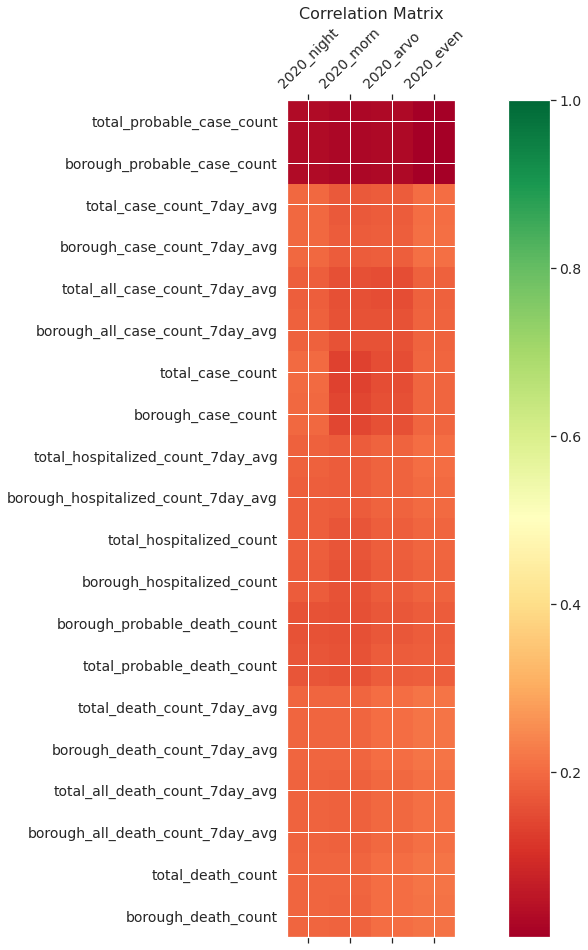

In [28]:
day_parts_2020 = ["2020_night","2020_morn","2020_arvo","2020_even"]
column_temp1 = covid_cols.copy()
column_temp1.extend(day_parts_2020)

dfs = dft[column_temp1].corr().drop(day_parts_2020)[day_parts_2020].abs()#[covid_cols, day_parts_2020]


f = plt.figure(figsize=(19, 15))
plt.matshow(dfs, fignum=f.number, vmax = 1, cmap = "RdYlGn")
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#one from first 2, 
#niether both no correlation

#one from next 6, 
#borough_Case_count + 7day average
#compare it next

#one from next 8
#

#one from last 4

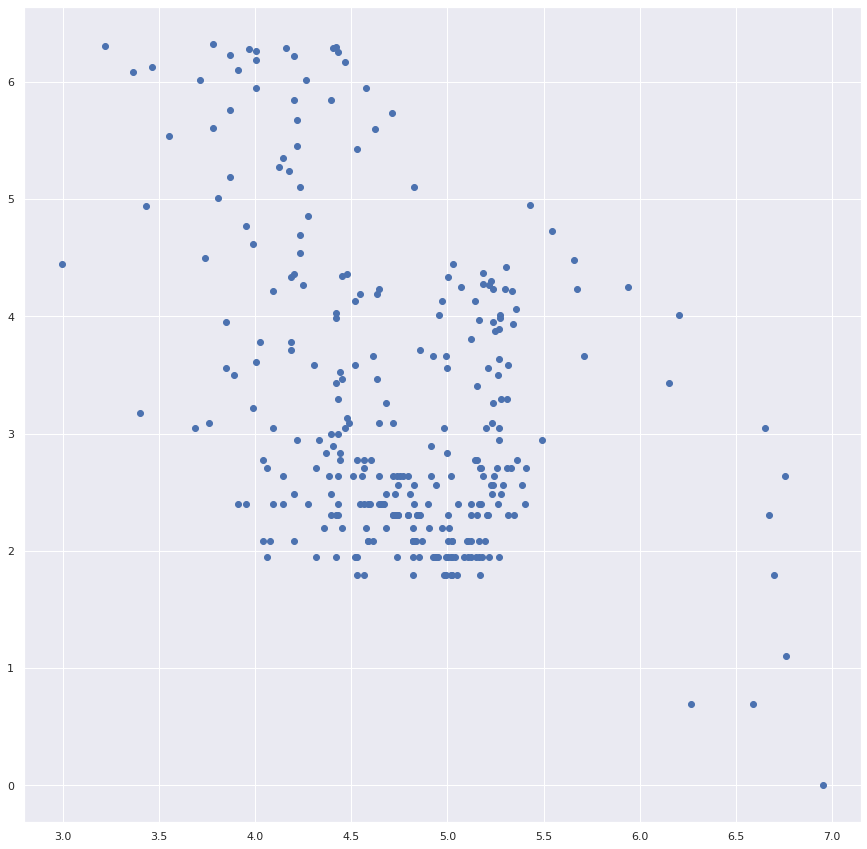

In [32]:
# Fixing random state for reproducibility
np.random.seed(19680801)

#N = 50
x = log(dft.loc[dft['fhv'] == 0]["2020_morn"])
y = log(dft.loc[dft['fhv'] == 0]['borough_hospitalized_count_7day_avg'])
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y)#, c=colors, alpha=0.5)
plt.show()

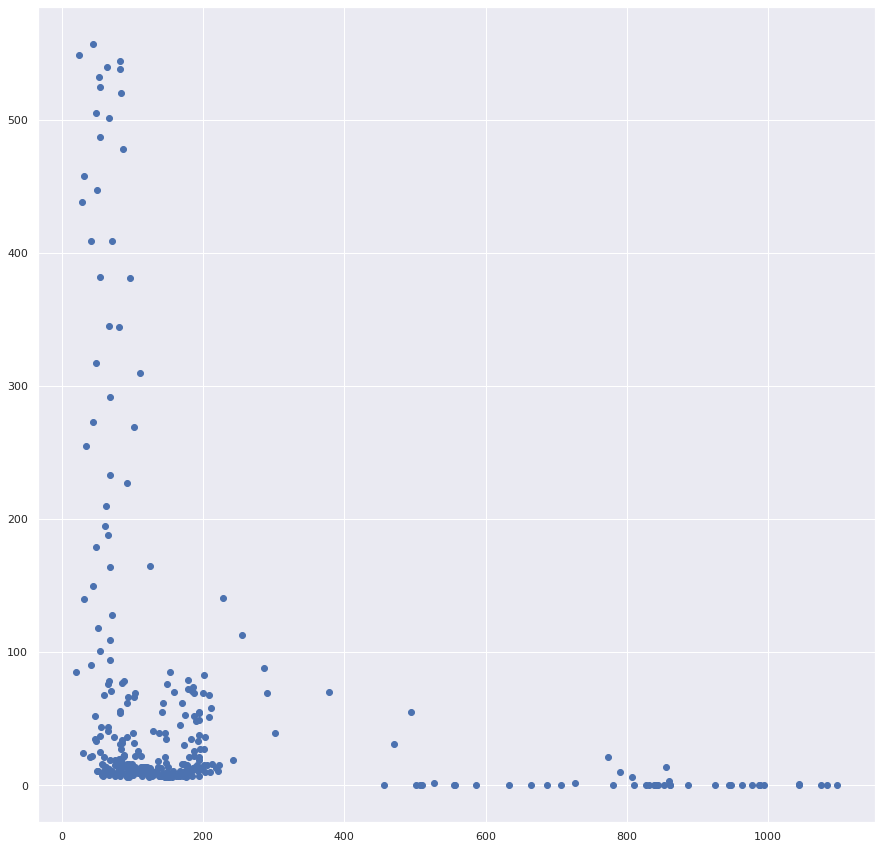

In [35]:
# Fixing random state for reproducibility
np.random.seed(19680801)

#N = 50
x = dft.loc[dft['fhv'] == 0]["2020_morn"]
y = dft.loc[dft['fhv'] == 0]['borough_hospitalized_count_7day_avg']
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y)#, c=colors, alpha=0.5)
plt.show()

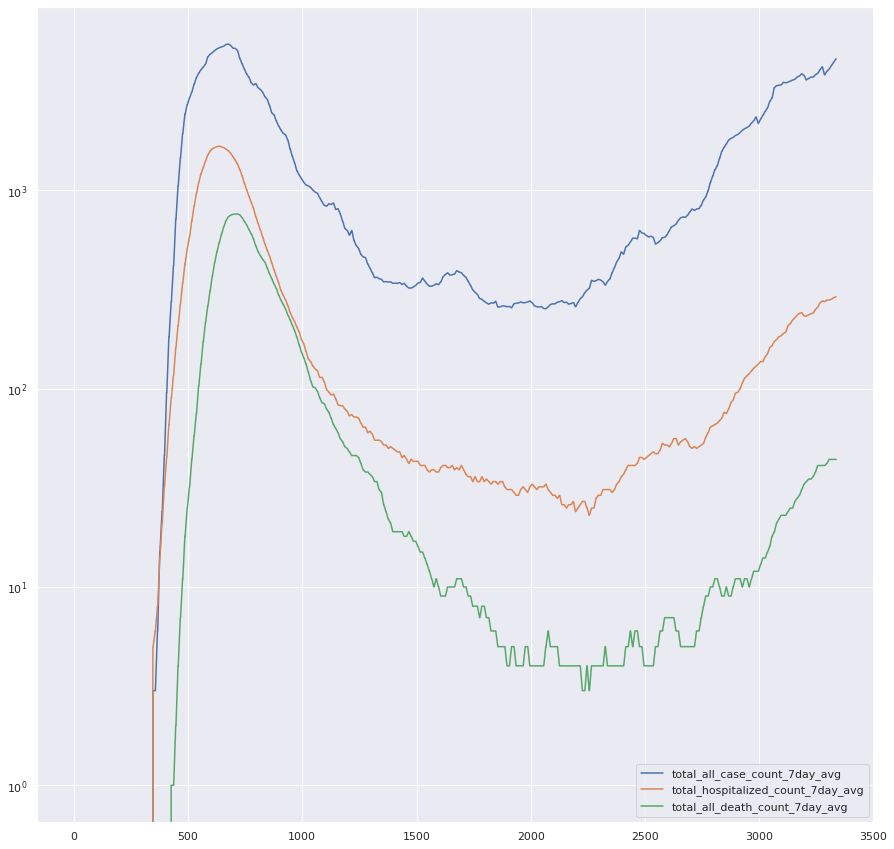

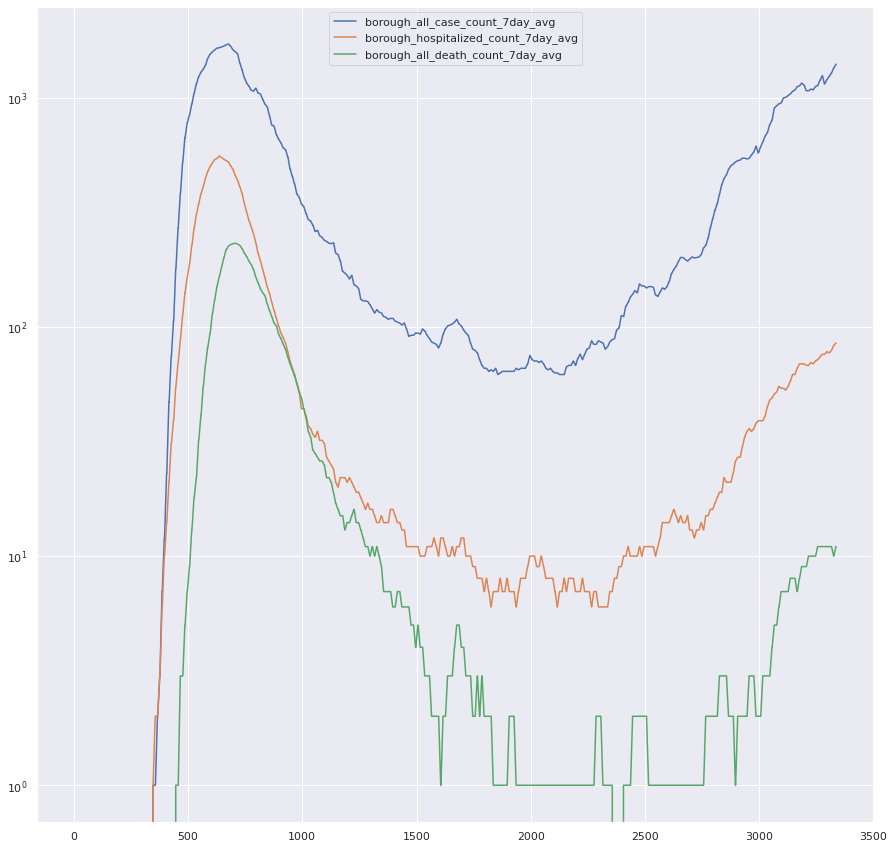

In [36]:
fig, ax = plt.subplots()
#xticks = (dft["week"]*(366/52) + dft["day"])
#lns1 = ax.plot(xticks, dft[["2020_morn"]], color = 'green', label = "2020_morn")


dft[[
     'total_all_case_count_7day_avg', 
     'total_hospitalized_count_7day_avg',
     'total_all_death_count_7day_avg',
]].plot(ax = ax)


ax.set_yscale('log')

fig2, ax2 = plt.subplots()
dft[[
     'borough_all_case_count_7day_avg', 
     'borough_hospitalized_count_7day_avg',
     'borough_all_death_count_7day_avg'
        ]].plot(ax = ax2)
ax2.set_yscale('log')





In [37]:
dft = dft.loc[dft["fhv"] == 1]

In [64]:
def compare_these_cols(graphing_cols):
    fig, ax = plt.subplots()
    xticks = (dft["day_year"])
    
    ax.set_xticklabels = xticks
    ax.set_xticks = xticks
    
    lns1 = ax.plot(xticks, dft[[graphing_cols[0]]], color = 'green', label = graphing_cols[0])
    ax.set_yscale('log')
    ax.tick_params(axis='y', labelcolor='green')
    ax.set_xlabel("Day of 2020")
    ax.set_ylabel(graphing_cols[0])
    
    ax2 = ax.twinx()
    lns2 = ax2.plot(xticks, dft[[graphing_cols[1]]], color = 'blue', label = graphing_cols[1])
    ax2.set_yscale('log')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.set_ylabel(graphing_cols[1])
    
    lns = lns1 + lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

    for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(20)

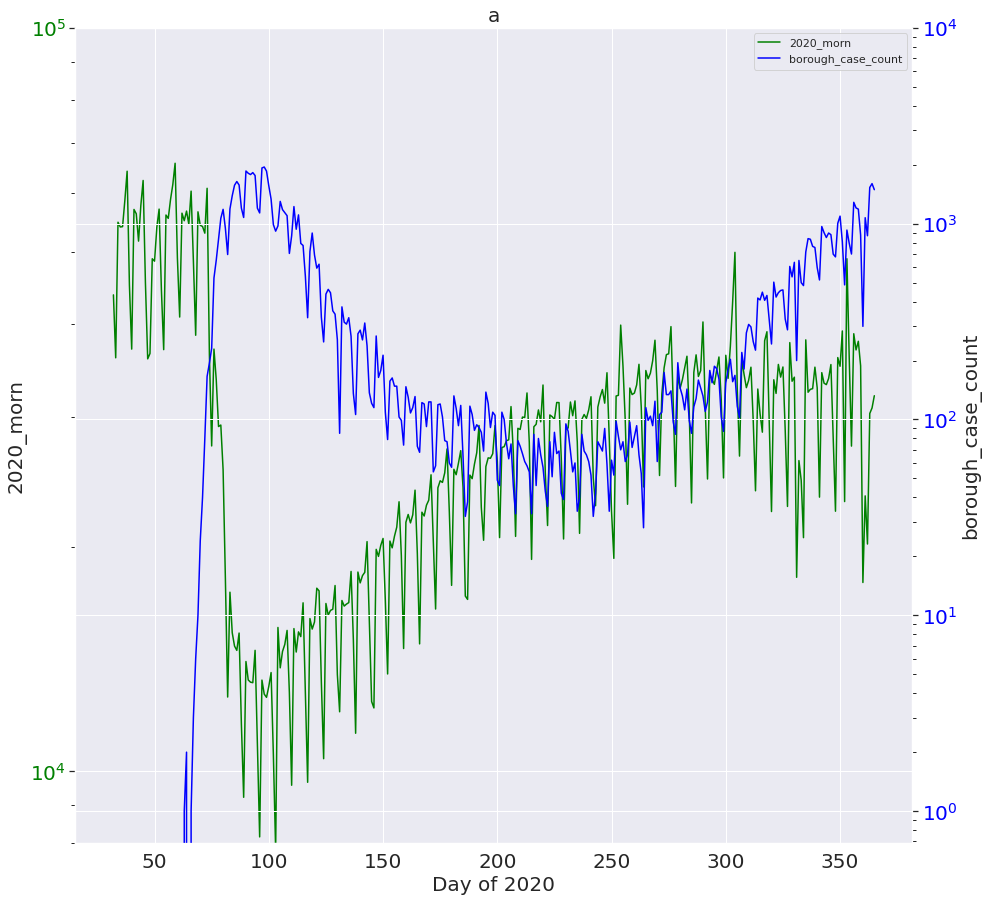

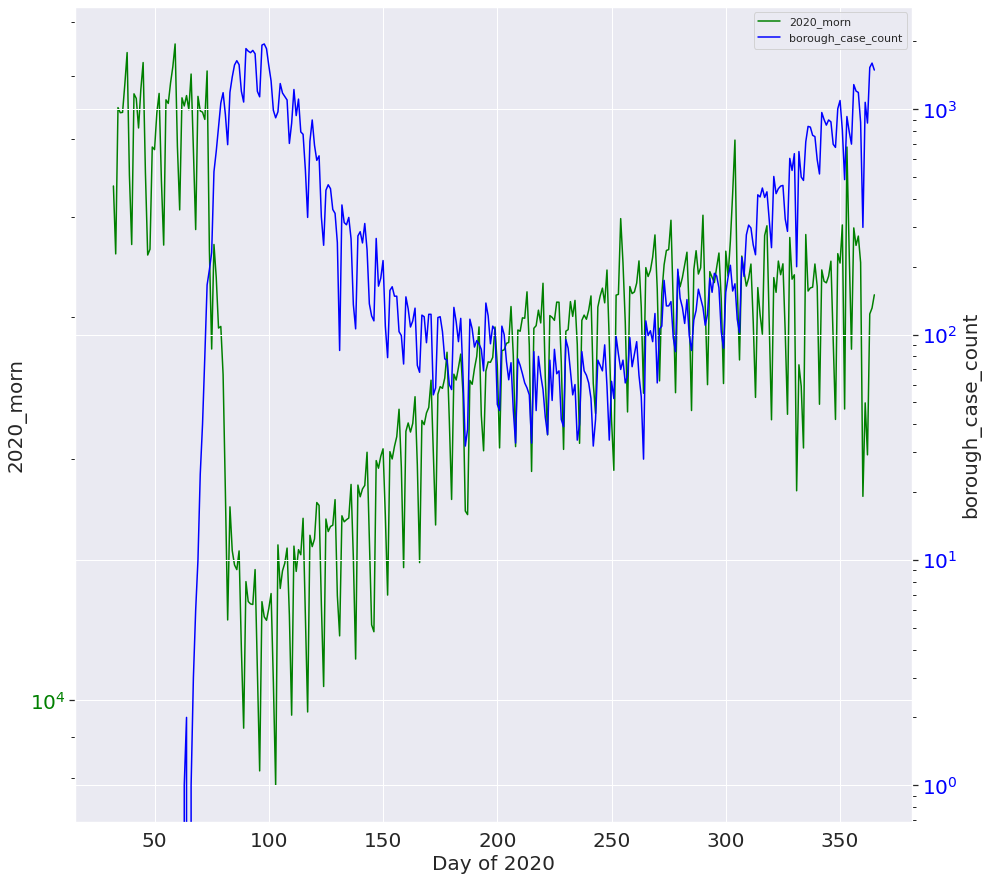

In [65]:
compare_these_cols(["2020_morn","borough_case_count"])

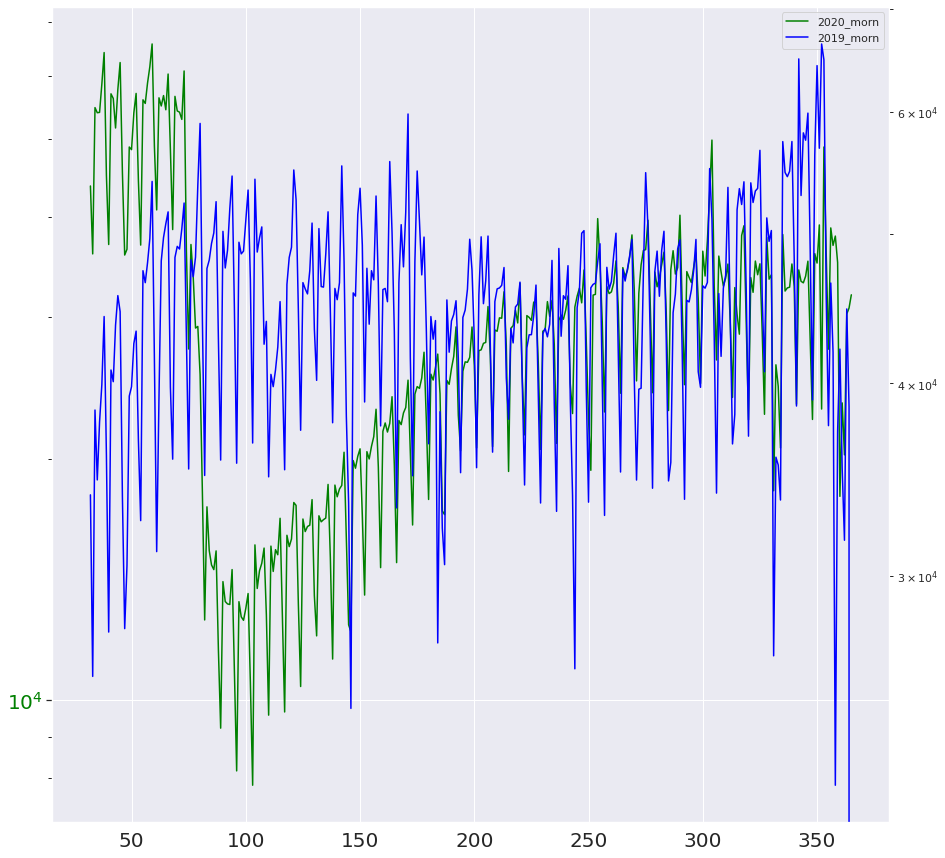

In [48]:
compare_these_cols(["2020_morn","2019_morn"])

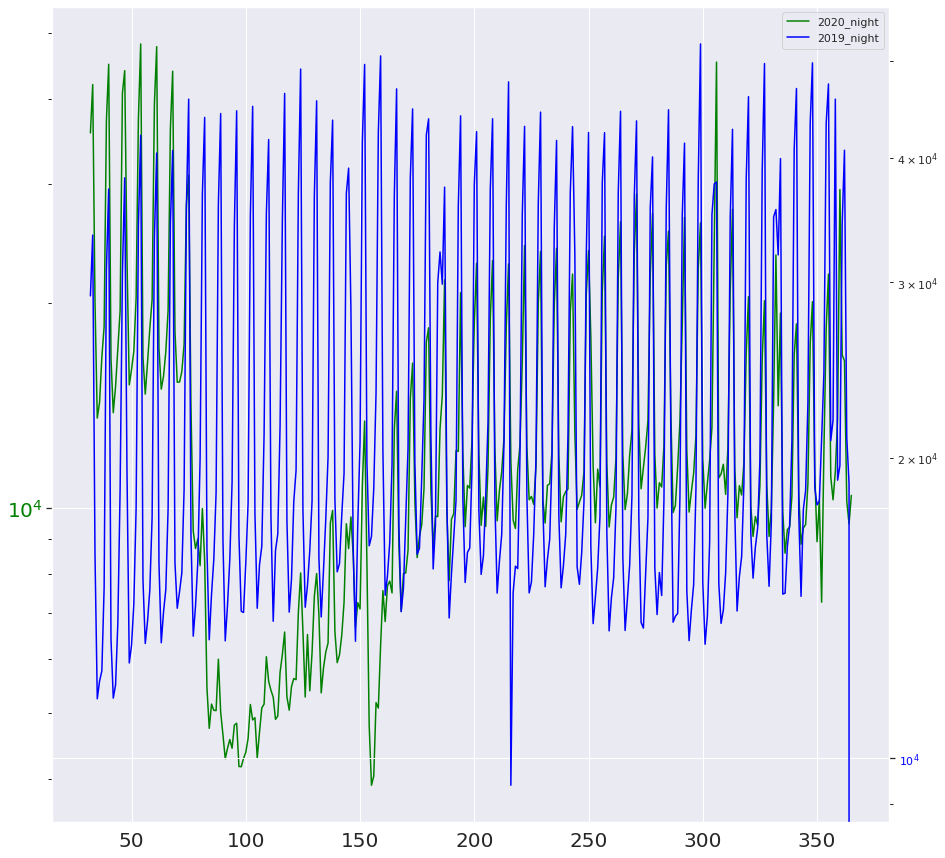

In [49]:
compare_these_cols(["2020_night","2019_night"])

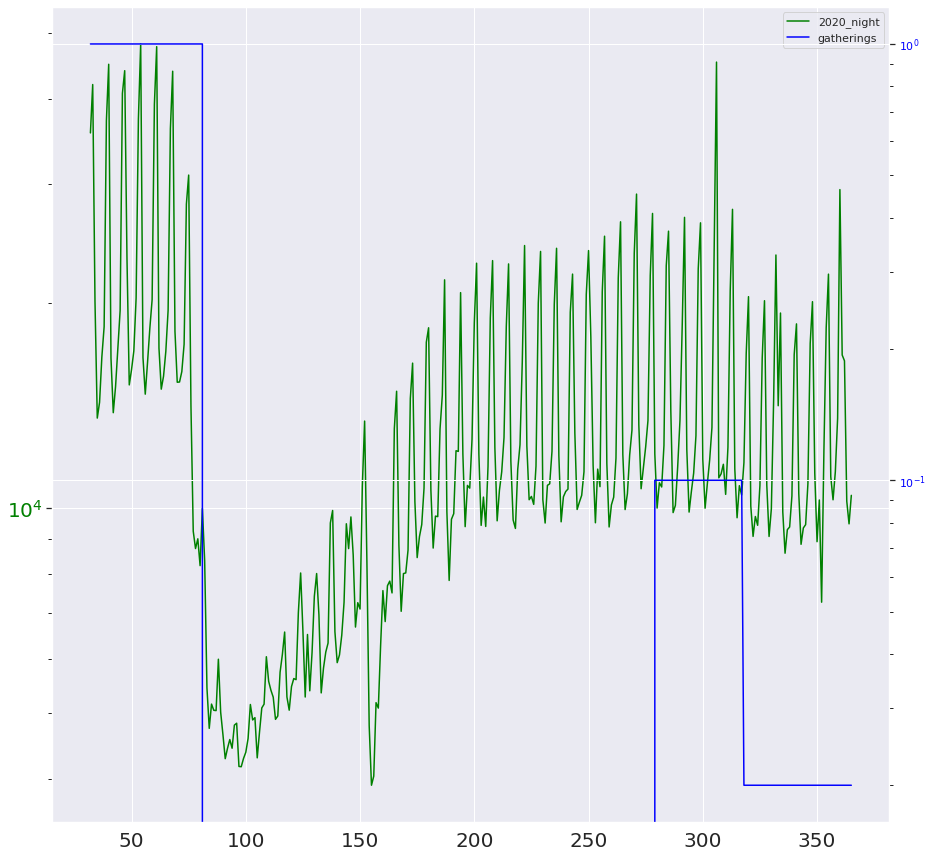

In [50]:
compare_these_cols(["2020_night",'gatherings'])